# **Brain Tumor Detection**

**TEAM MEMEBERS :**

JYOSTHNA CHIDARAPADU, USN:1RVU22BSC021

SRUTHI BASINENI , USN:1RVU22BSC013

NISHITA BANKAPUR, USN: 1RVU22BSC063

**PROBLEM STATEMENT:** Developing a detection model using CNN (Convolutional Neural Networks) to analyze MRI scans for detection of brain tumors.

**About the Brain MRI Images dataset:**
The dataset contains 2 folders: yes and no which contains 253 Brain MRI Images. The folder yes contains 155 Brain MRI Images that are tumorous and the folder no contains 98 Brain MRI Images that are non-tumorous.

**Import Necessary Modules**

In [ ]:
#Importing Modules
import zipfile
import os
import numpy as np
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.utils import shuffle

**Extracting Brain Tumor Dataset from ZIP File**

In [ ]:
# Path to the zip file
zip_file_path = '/content/brain_tumor1.zip'

# Directory to extract the dataset
extracted_dataset_path = '/content/extracted'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dataset_path)

**Load Data**

In [ ]:
# Function to load data
def load_data(data_dir):
    X = []  # List to store image data
    y = []  # List to store labels

    # Iterate over subdirectories in the data_dir
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)  # Path to the current subdirectory

        # Check if the current path is a directory
        if os.path.isdir(label_dir):
            print("Loading data from", label_dir)

            # Iterate over files in the current subdirectory
            for image_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, image_file)  # Path to the current image file

                # Check if the current path is a file
                if os.path.isfile(img_path):
                    img = image.load_img(img_path, target_size=(150, 150))  # Load the image with a target size of 150x150
                    img_array = image.img_to_array(img)  # Convert the image to a NumPy array
                    X.append(img_array)  # Append the image data to the X list
                    y.append(label)  # Append the label (subdirectory name) to the y list

    # Convert the lists to NumPy arrays
    return np.array(X), np.array(y)

# Load data from the specified directory
data_dir = "/content/extracted/brain_tumor_dataset"
X, y = load_data(data_dir)

Loading data from /content/extracted/brain_tumor_dataset/yes
Loading data from /content/extracted/brain_tumor_dataset/no


**Image Visualization**

Displaying images of class 'yes':


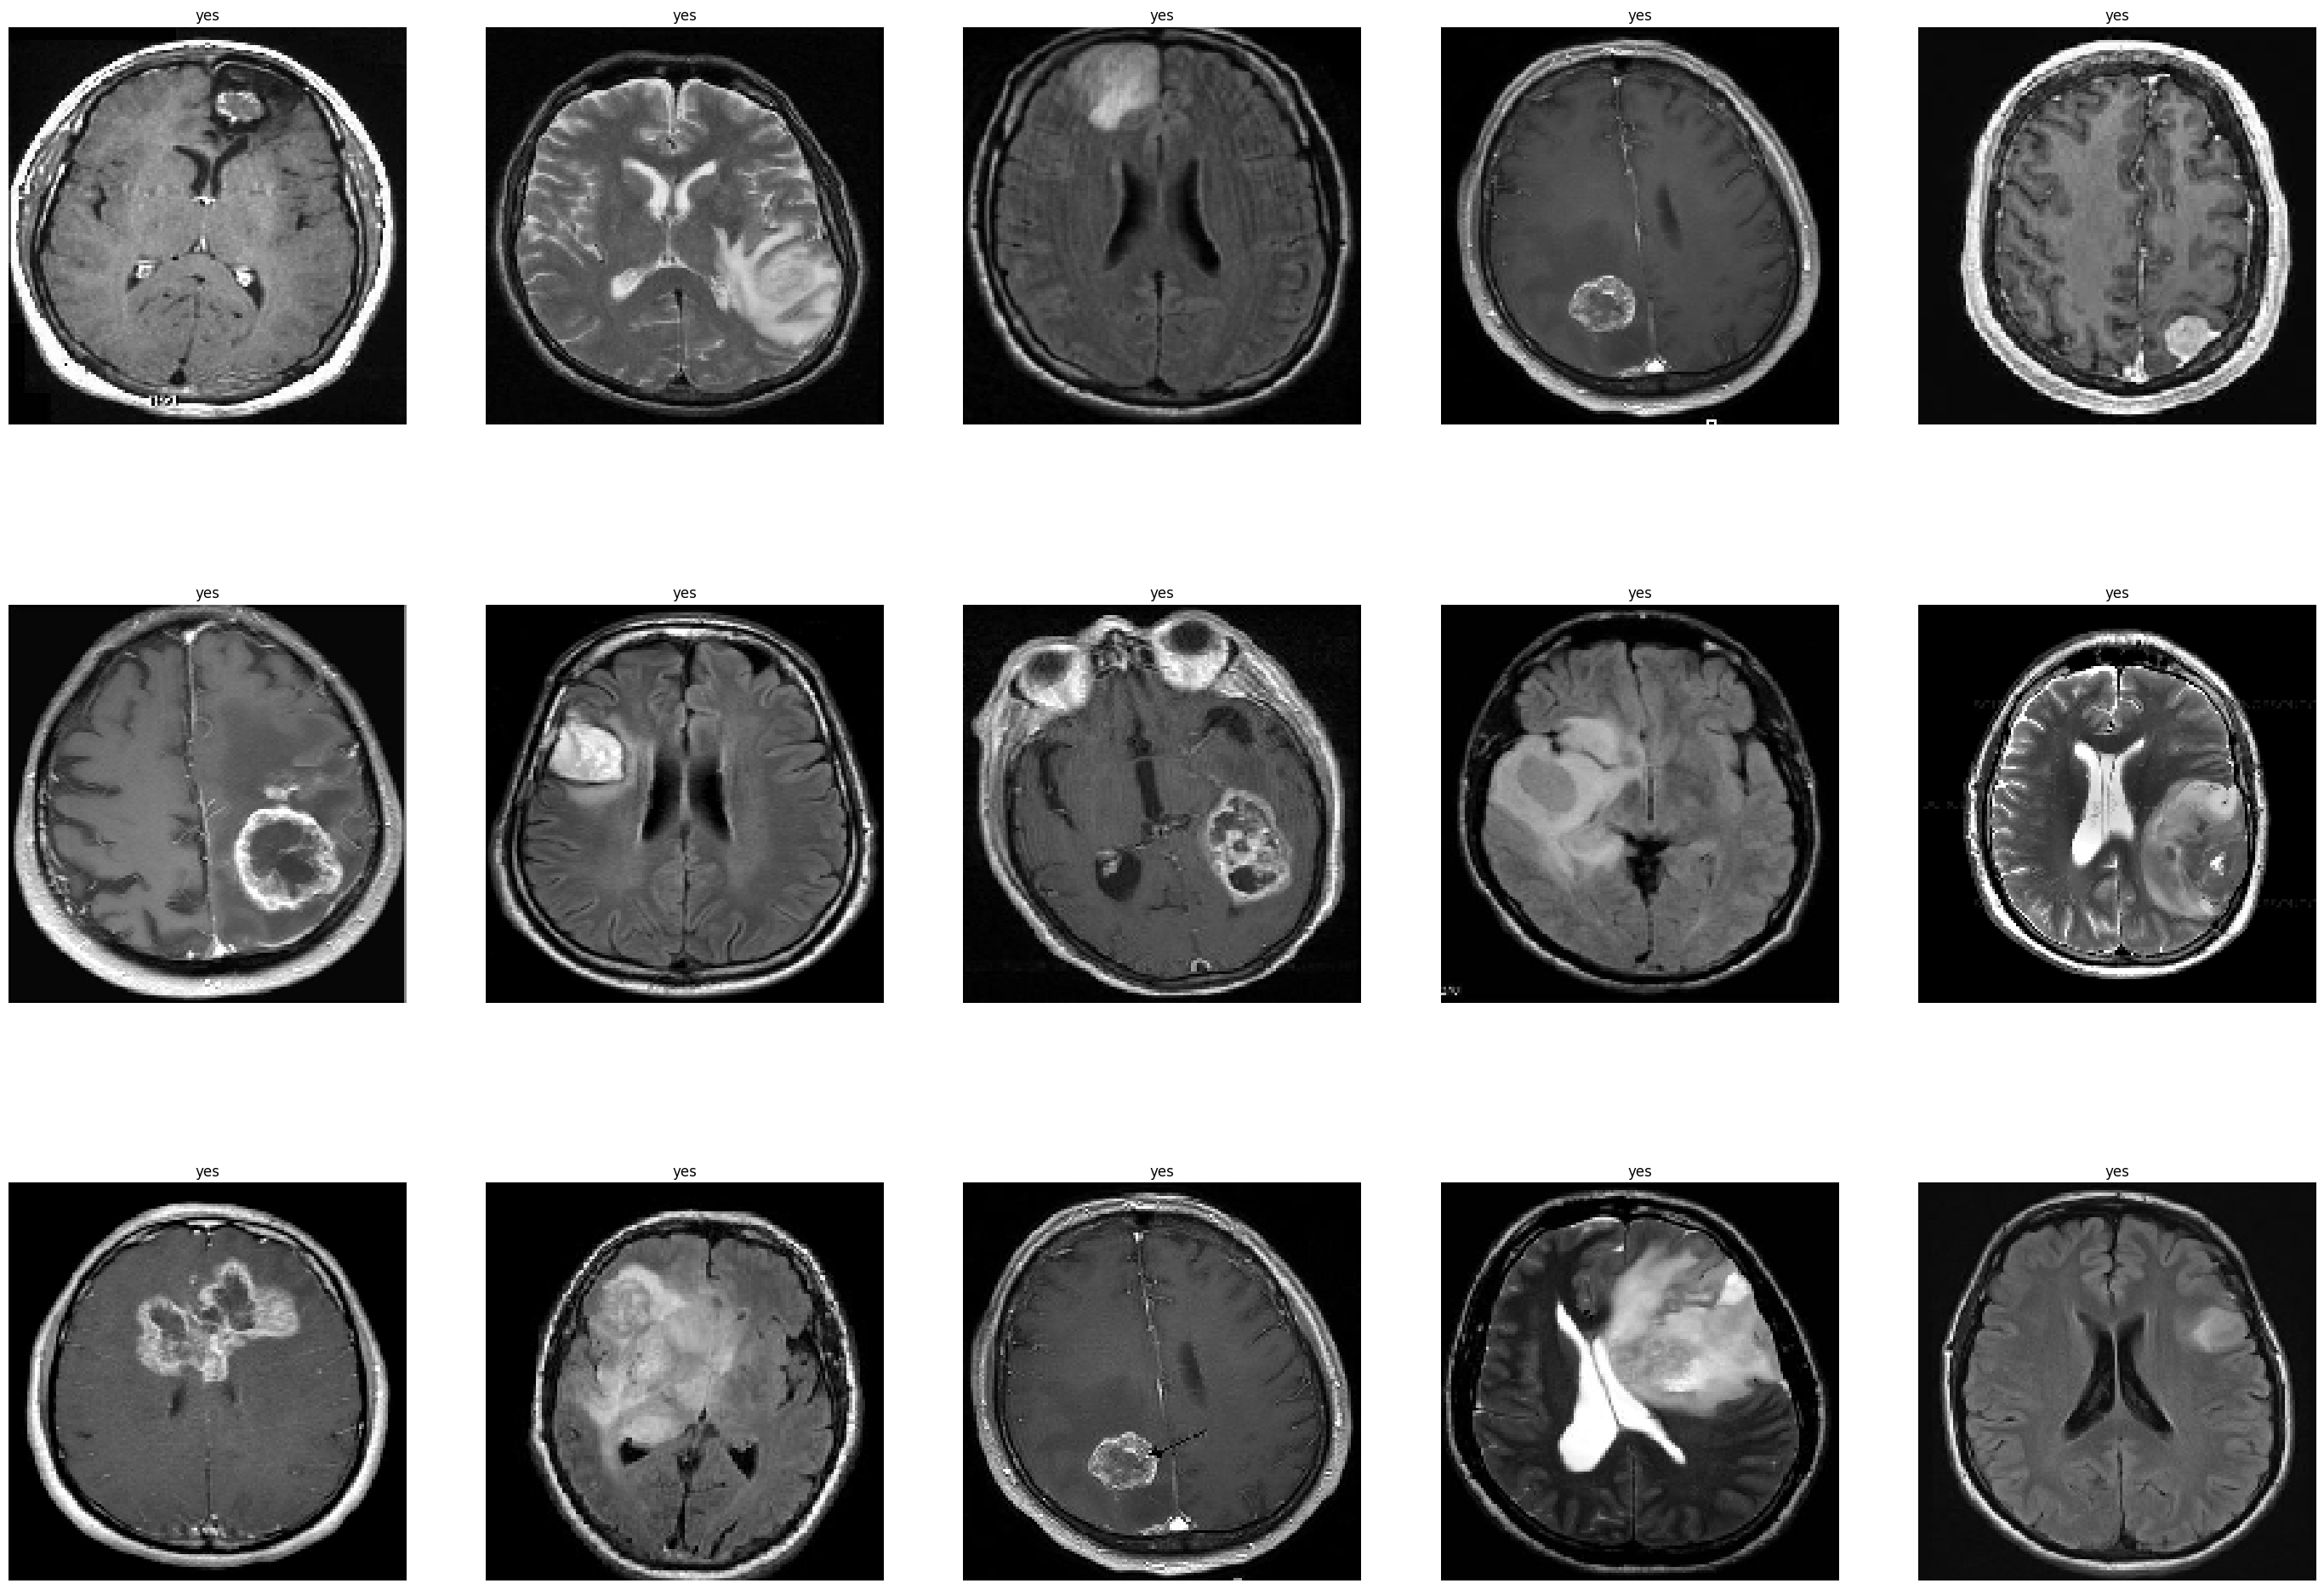

Displaying images of class 'no':


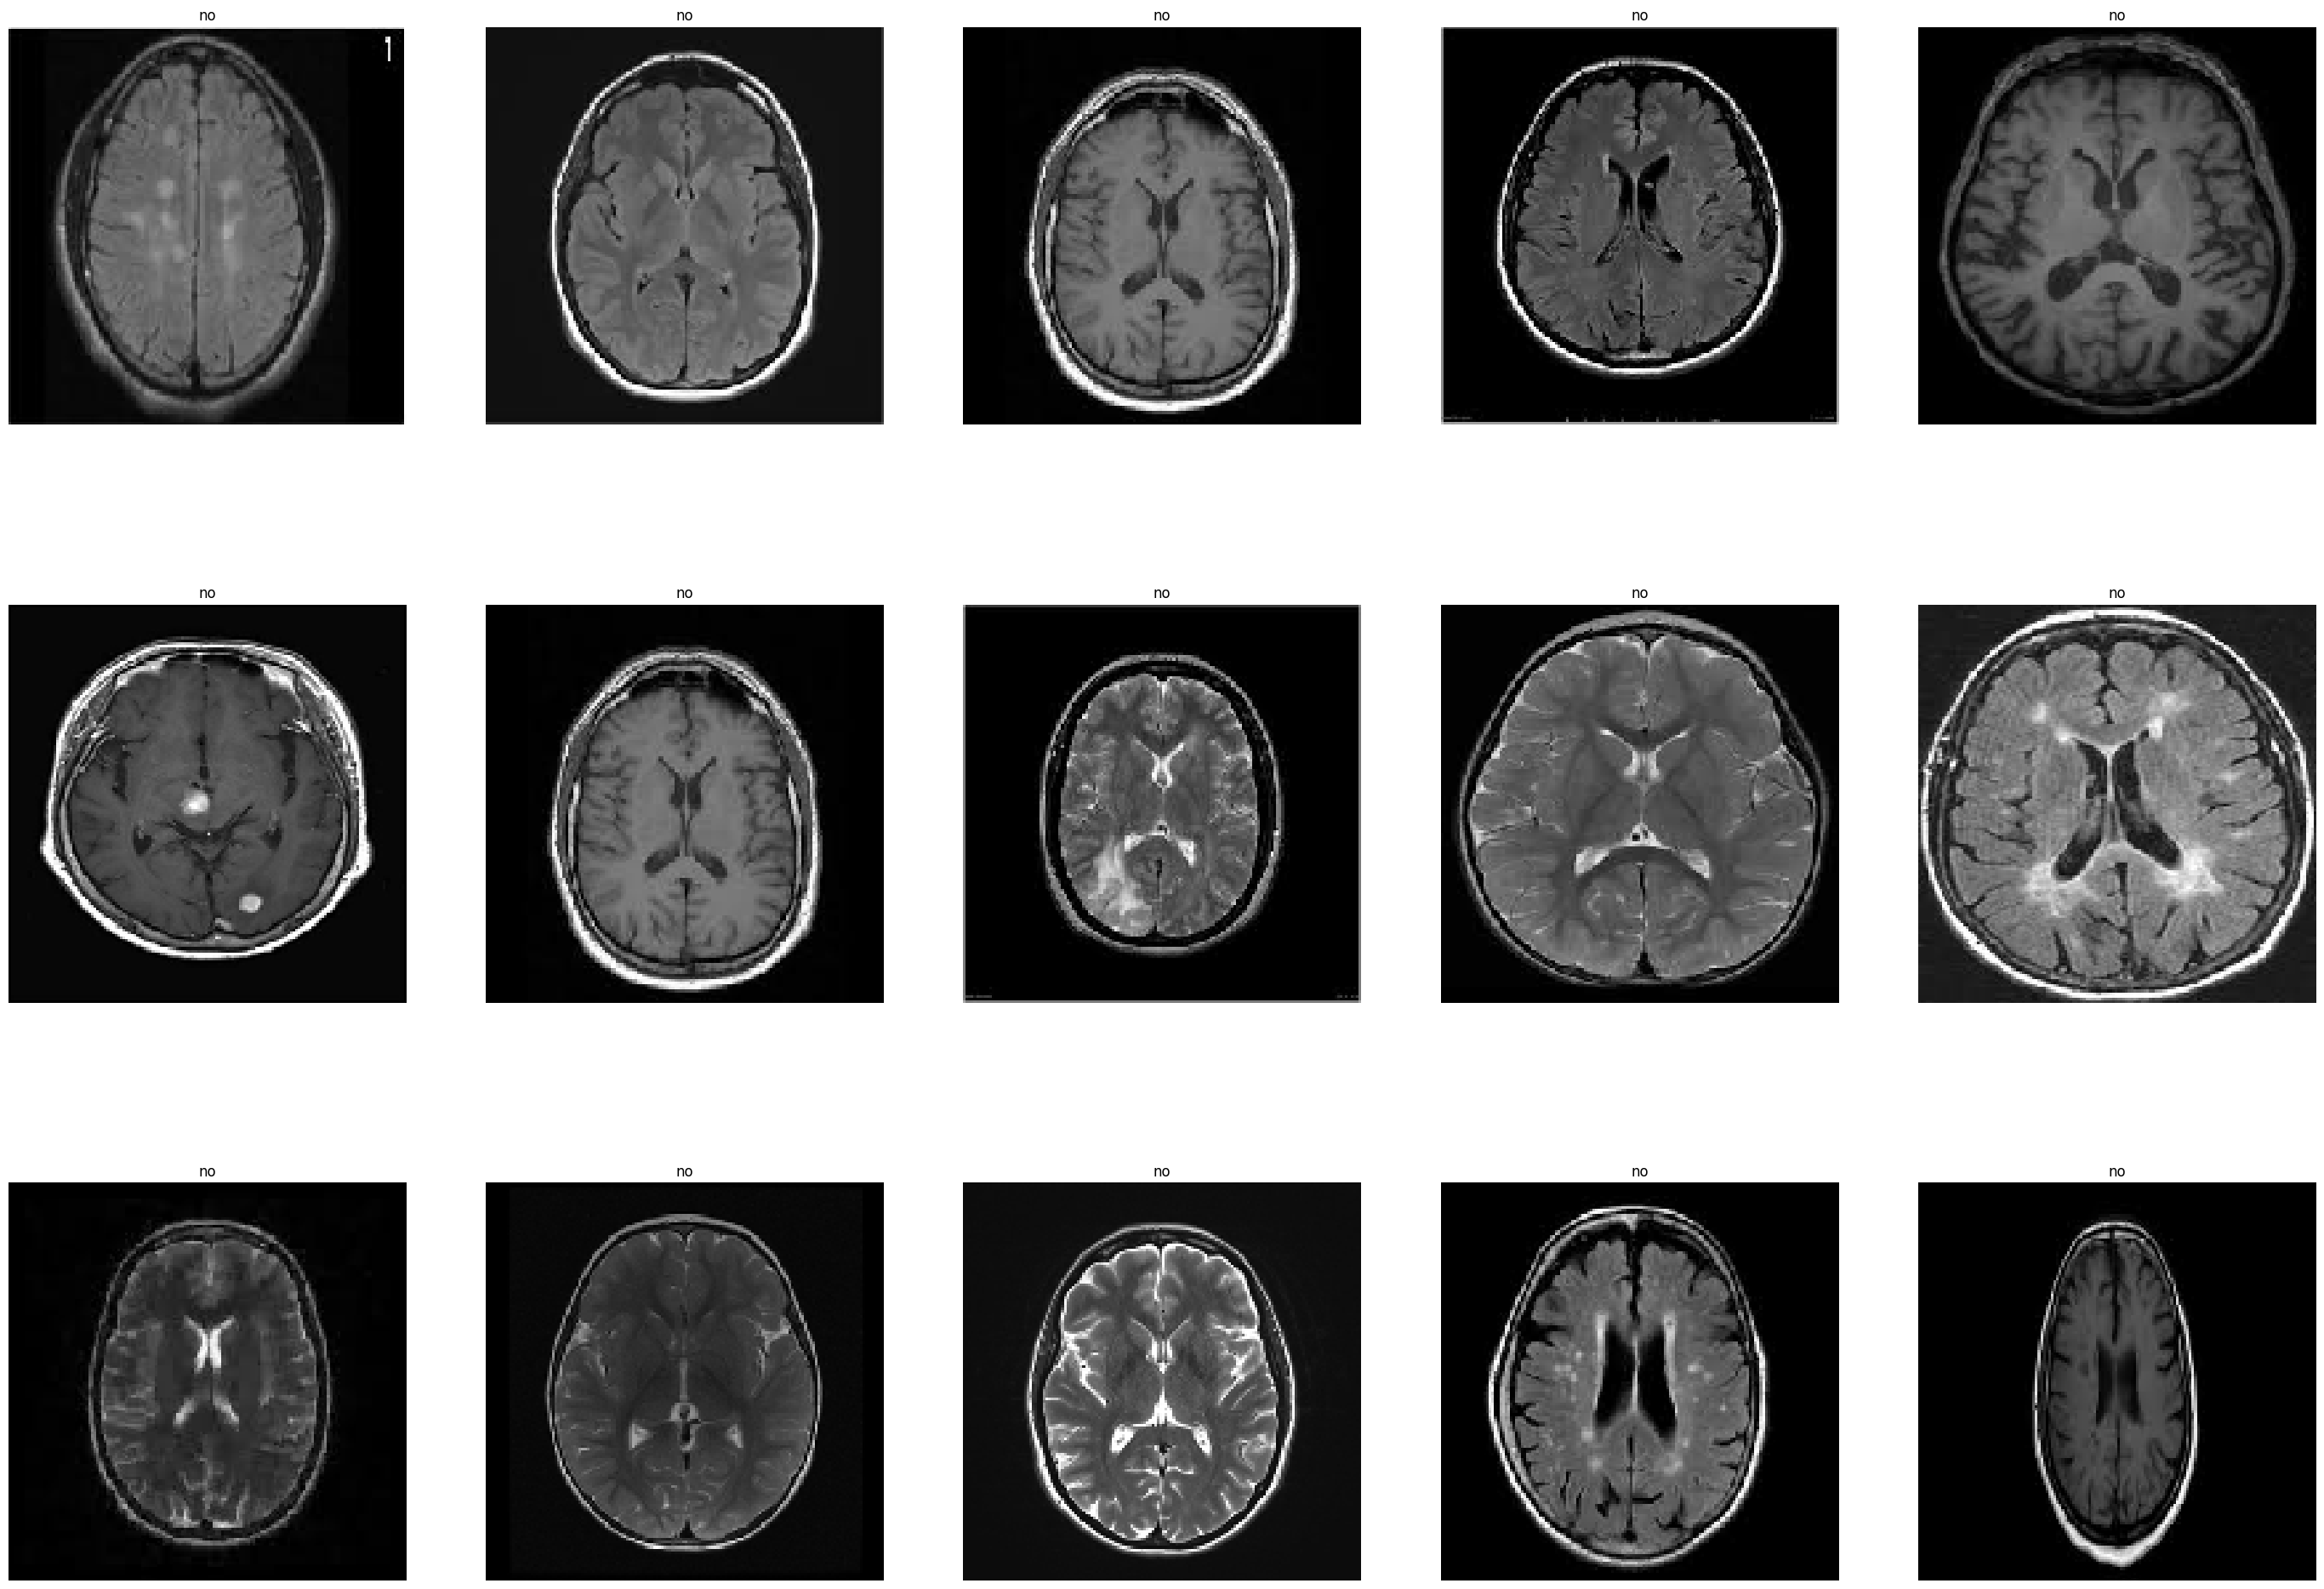

In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

def display_images(data_dir, label, figsize=(35, 25), grid_size=(3, 5), image_size=(150, 150)):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        print(f"Displaying images of class '{label}':")

        # Get all image files in the directory
        image_files = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))]

        # Calculate total number of images to display and ensure it's less than or equal to the grid size
        num_images = min(len(image_files), grid_size[0] * grid_size[1])

        # Create the figure and axis objects
        fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figsize)

        # Loop through the images and display them in the subplot grid
        for i, ax in enumerate(axes.flat):
            if i < num_images:
                img_path = os.path.join(label_dir, image_files[i])
                img = image.load_img(img_path, target_size=image_size)
                ax.imshow(img)
                ax.set_title(label)
                ax.axis('off')
            else:
                ax.axis('off')  # Hide empty subplots

        plt.show()
    else:
        print(f"No images found for class '{label}'")

# Display images of the "yes" class in a 3x5 grid layout
display_images(data_dir, 'yes', figsize=(35, 25), grid_size=(3, 5), image_size=(150, 150))

# Display images of the "no" class in a 3x5 grid layout
display_images(data_dir, 'no', figsize=(35, 25), grid_size=(3, 5), image_size=(150, 150))


**Image Preprocesssing and Formatting**

This code section handles the preprocessing of the image data, specifically the normalization of pixel values, before feeding the data to a machine learning model. We also normalise the inputs so that pixel values are in the [0-1] range rather than [0-255].

In [ ]:
# Preprocess images
X_preprocessed = X / 255.0
print("Shape of preprocessed images:", X_preprocessed[0].shape)

Shape of preprocessed images: (150, 150, 3)


**Encoding Labels as Numerical Values**

Converting the string labels in the y array to numerical values for use in machine learning models.

In [ ]:
# Convert labels to numerical format
class_to_index = {'no': 0, 'yes': 1}
y_train_numerical = np.array([class_to_index[label] for label in y_train])
y_val_numerical = np.array([class_to_index[label] for label in y_val])

# Ensure data type compatibility
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now X_train, y_train are for training, X_val, y_val are for validation, and X_test, y_test are for testing


**Data Shape Check after Splitting**

This process ensures that the data splitting was done right by looking at the sizes of the training and validation sets, along with their labels.

In [ ]:
# Check the shapes of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

Training data shape: (202, 150, 150, 3)
Validation data shape: (25, 150, 150, 3)
Training labels shape: (202,)
Validation labels shape: (25,)


**Build The Model**

Let's build  a convolutional neural network model:

**Neural Network Architecture:**

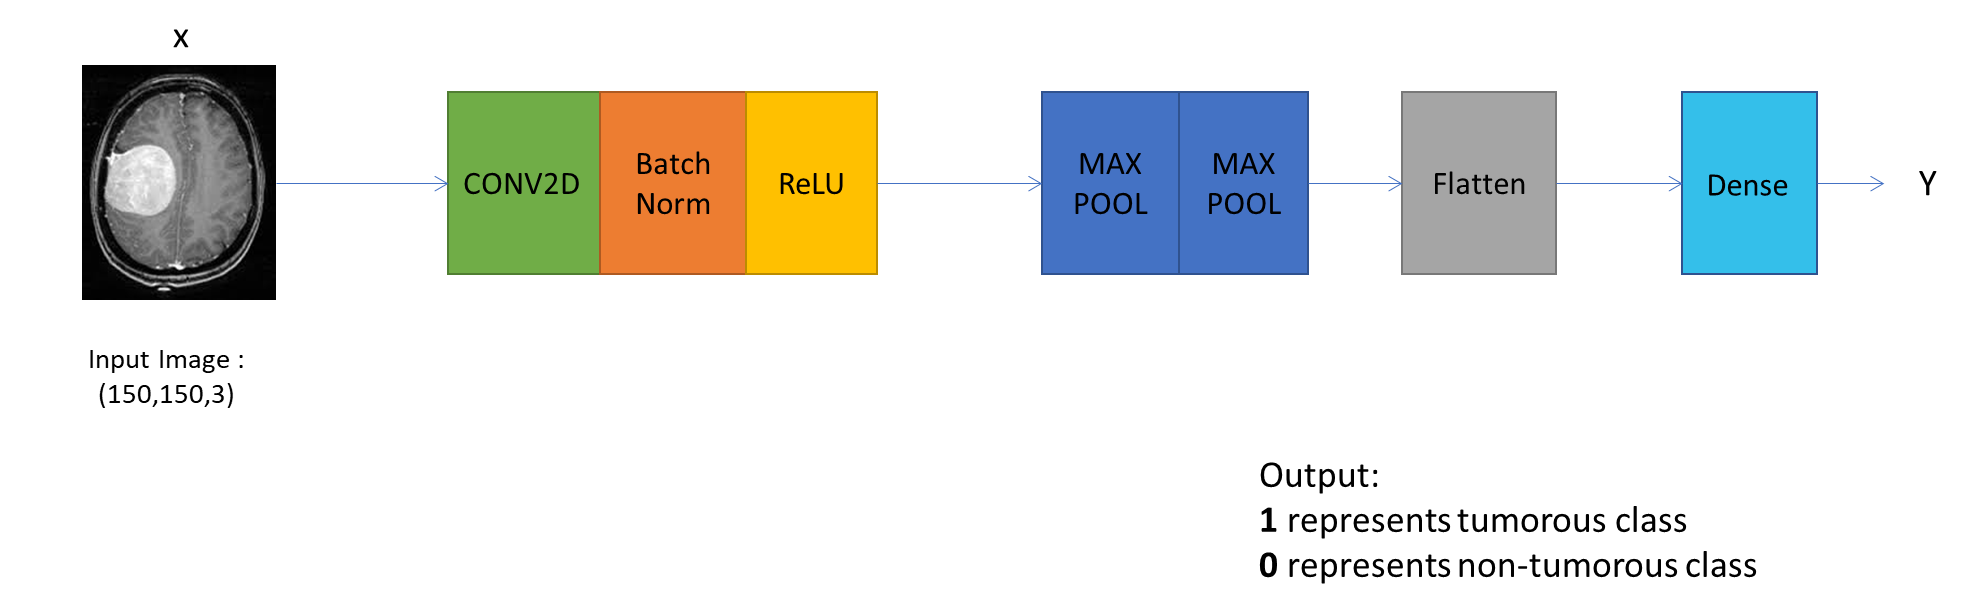

**Convolutional Neural Network (CNN) Model Architecture and Compilation**

This process involves defining a Convolutional Neural Network (CNN) using Keras Sequential API for binary classification. The architecture includes convolutional layers followed by max-pooling layers for feature extraction, and dense layers for classification. The model is compiled with the Adam optimizer and binary cross-entropy loss, with accuracy as the evaluation metric.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 17, 17, 128)     

**Training the Model**

This step trains the defined Convolutional Neural Network (CNN) model using the training data (X_train and y_train) for 20 epochs with a batch size of 32.

In [ ]:
# Train the model
history = model.fit(X_train, y_train_numerical, epochs=20, batch_size=32, validation_data=(X_val, y_val_numerical))

Epoch 1/20
7/7 [==============================] - 14s 1s/step - loss: 30.3235 - accuracy: 0.5446 - val_loss: 0.5052 - val_accuracy: 0.8400
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 0.5502 - accuracy: 0.7228 - val_loss: 0.4046 - val_accuracy: 0.9200
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 0.5262 - accuracy: 0.7574 - val_loss: 0.4511 - val_accuracy: 0.8800
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.4513 - accuracy: 0.8119 - val_loss: 0.5632 - val_accuracy: 0.7200
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.4362 - accuracy: 0.7921 - val_loss: 0.6586 - val_accuracy: 0.7200
Epoch 6/20
7/7 [==============================] - 11s 2s/step - loss: 0.3993 - accuracy: 0.8218 - val_loss: 0.4954 - val_accuracy: 0.7200
Epoch 7/20
7/7 [==============================] - 11s 2s/step - loss: 0.3700 - accuracy: 0.8317 - val_loss: 0.3386 - val_accuracy: 0.8800
Epoch 8/20
7/7 [=================

**Label Conversion and Model Evaluation (Validation Set)**

This step involves converting class labels into numerical format for compatibility and evaluating the trained model's performance on the validation set. Metrics such as validation loss, accuracy, and F1 score are calculated to assess the model's effectiveness in classifying the validation data.



In [ ]:
# Convert labels to numerical format
class_to_index = {'no': 0, 'yes': 1}
y_train_numerical = np.array([class_to_index[label] for label in y_train])
y_val_numerical = np.array([class_to_index[label] for label in y_val])
y_test_numerical = np.array([class_to_index[label] for label in y_test])

# Ensure data type compatibility
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val_numerical)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

from sklearn.metrics import f1_score

# Predict probabilities for the validation set
y_val_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

# Calculate F1 score for validation set
val_f1 = f1_score(y_val_numerical, y_val_pred)
print("Validation F1 Score:", val_f1)


1/1 [==============================] - 0s 373ms/step - loss: 0.3368 - accuracy: 0.8800
Validation Loss: 0.33678337931632996
Validation Accuracy: 0.8799999952316284
1/1 [==============================] - 0s 421ms/step
Validation F1 Score: 0.888888888888889


**Model Evaluation on Test Set**

This step evaluates the trained model's performance on the test set by predicting class probabilities and converting them into binary predictions. It then calculates the F1 score and accuracy to assess the model's effectiveness in classifying unseen test data.

In [ ]:
from sklearn.metrics import accuracy_score
# Predict probabilities for the test set
y_test_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate F1 score for test set
test_f1 = f1_score(y_test_numerical, y_test_pred)
print("Test F1 Score:", test_f1)

# Calculate accuracy for test set
test_accuracy = accuracy_score(y_test_numerical, y_test_pred)
print("Test Accuracy:", test_accuracy)


1/1 [==============================] - 0s 353ms/step
Test F1 Score: 0.923076923076923
Test Accuracy: 0.9230769230769231


**Plotting Training and Validation Accuracy**

This plot shows how the accuracy of a neural network model changes as it learns from the training data.

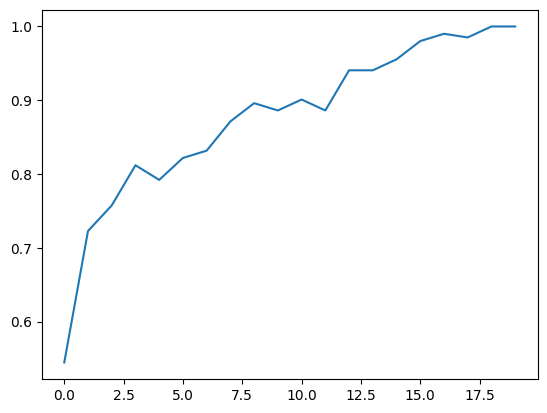

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])


**Plotting Accuracy and Loss during Training**

There are two plots generated to visualize the training progress of a neural network model. The first plot shows the changes in accuracy over epochs for both training and validation datasets, while the second plot displays the changes in loss function values.


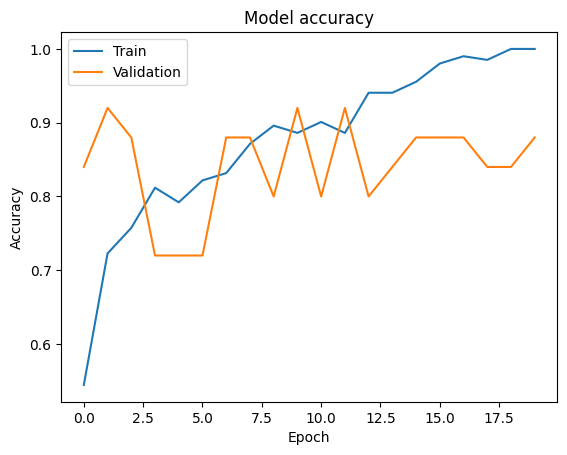

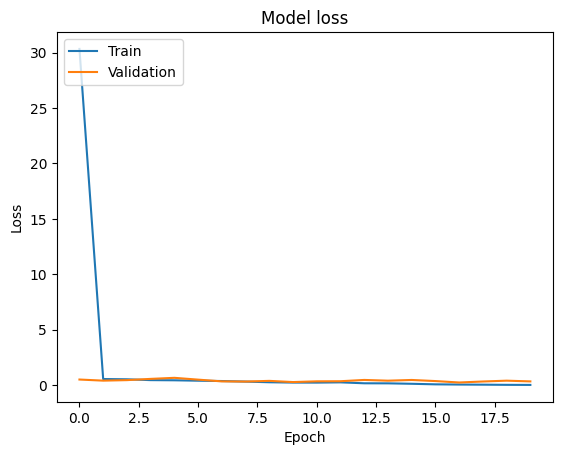

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **Conclusion:**

**The model detects brain tumor with:**

92.3% accuracy on the test set.

0.92 f1 score on the test set.

These resutls are very good considering that the data is balanced.

**Performance Table:**
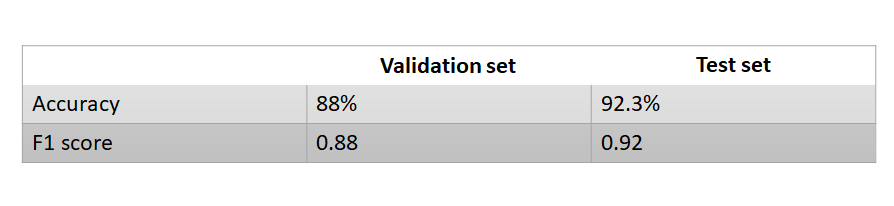